In [2]:
# Import all required modules
# Disable warnings
import warnings

import numpy as np
import pandas as pd

warnings.filterwarnings("ignore")

# Import plotting modules and set up
import seaborn as sns

sns.set()
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
# Tune the visual settings for figures in `seaborn`
sns.set_context(
    "notebook", font_scale=1.5, rc={"figure.figsize": (11, 8), "axes.titlesize": 18}
)

from matplotlib import rcParams

rcParams["figure.figsize"] = 11, 8

In [4]:
# for Jupyter-book, we copy data from GitHub, locally, to save Internet traffic,
# you can specify the data/ folder from the root of your cloned
# https://github.com/Yorko/mlcourse.ai repo, to save Internet traffic
DATA_PATH = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/main/data/"

In [5]:
df = pd.read_csv(DATA_PATH + "mlbootcamp5_train.csv", sep=";")
print("Dataset size: ", df.shape)
df.head()

Dataset size:  (70000, 13)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'active'),
  Text(1, 0, 'alco'),
  Text(2, 0, 'cardio'),
  Text(3, 0, 'cholesterol'),
  Text(4, 0, 'gender'),
  Text(5, 0, 'gluc'),
  Text(6, 0, 'smoke')])

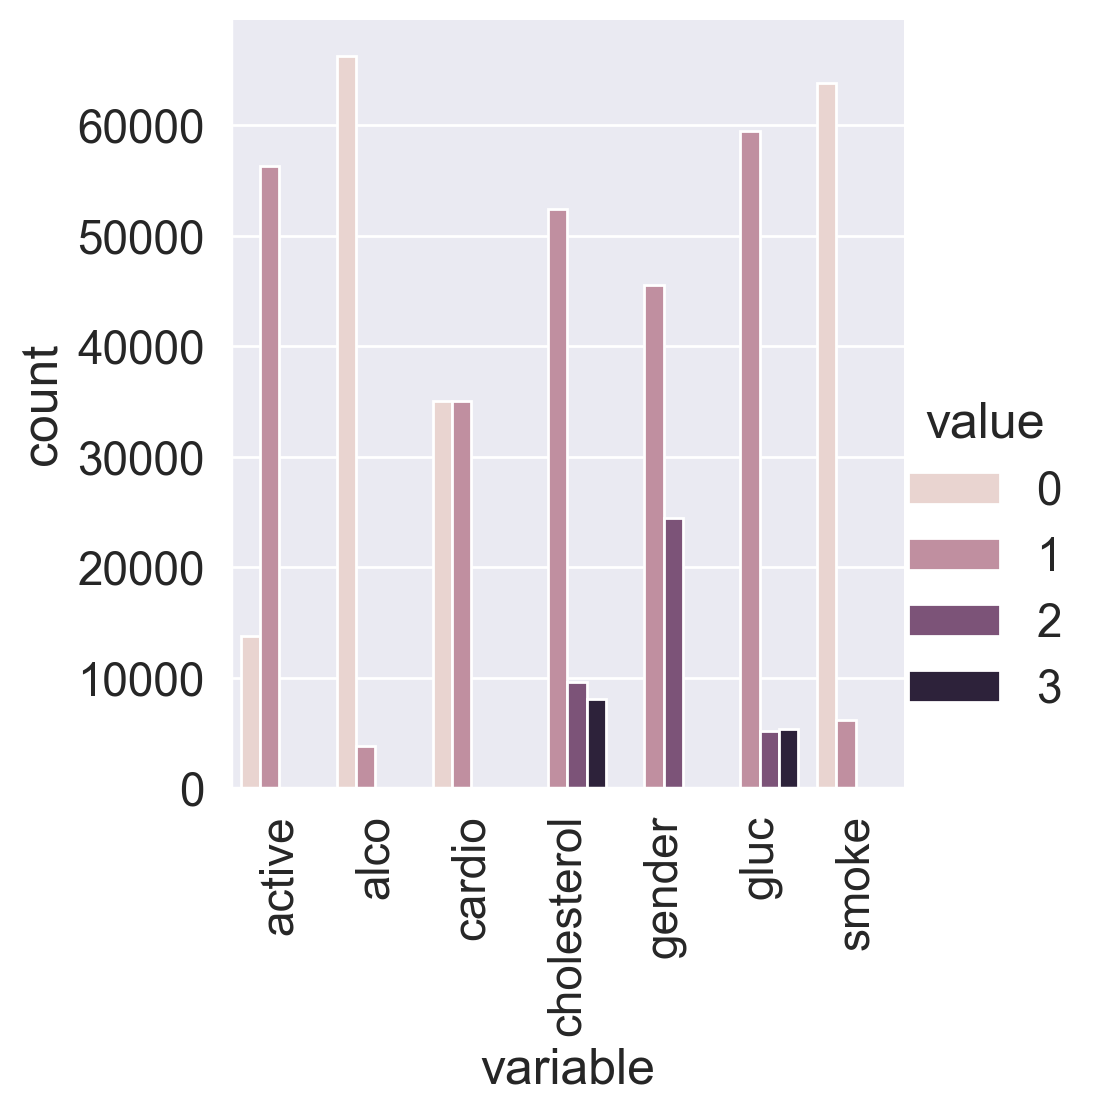

In [6]:
df_uniques = pd.melt(
    frame=df,
    value_vars=[
        'gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'
    ]
)

df_uniques = (
    pd.DataFrame(df_uniques.groupby(["variable", "value"])["value"].count())
    .sort_index(level=[0, 1])
    .rename(columns={"value": "count"})
    .reset_index()
)

sns.catplot(
    x='variable', y='count', hue='value', data=df_uniques, kind='bar'
)

plt.xticks(rotation=90)

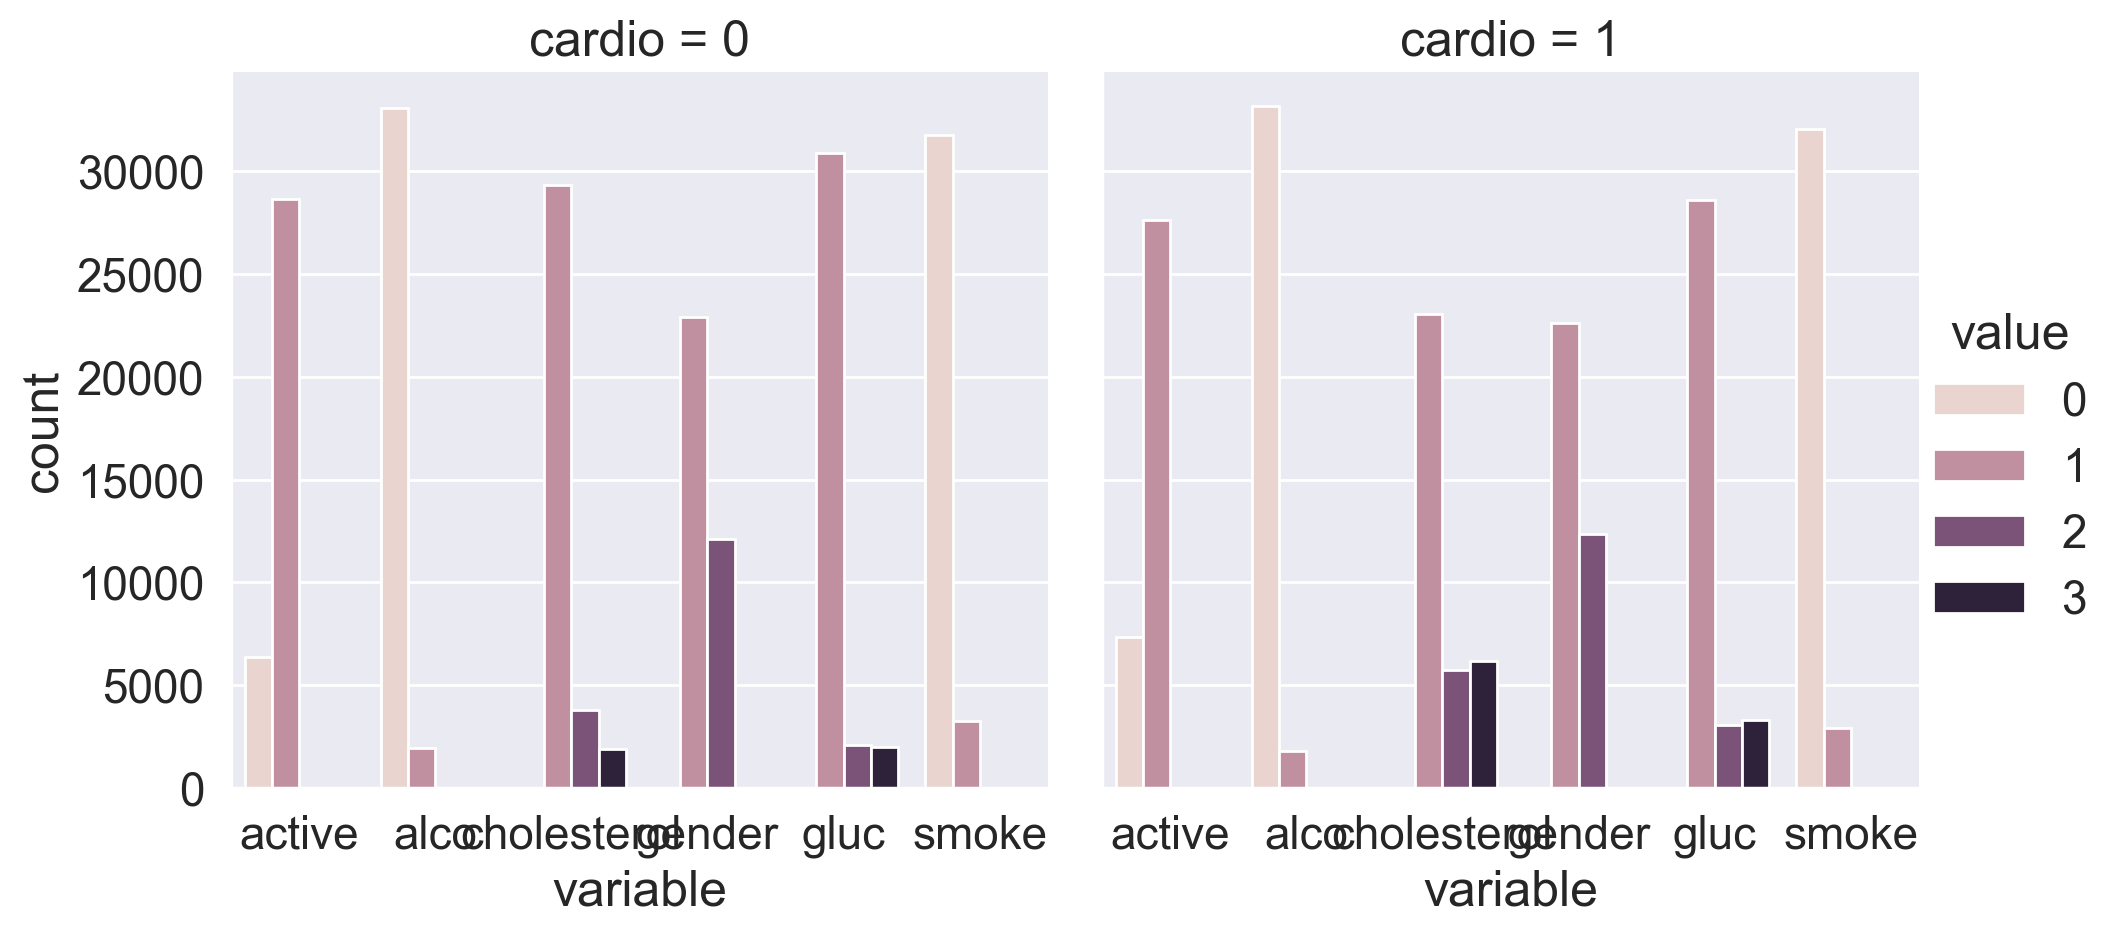

In [7]:
df_uniques = pd.melt(
    frame=df,
    value_vars=["gender", "cholesterol", "gluc", "smoke", "alco", "active"],
    id_vars=["cardio"],
)
df_uniques = (
    pd.DataFrame(df_uniques.groupby(["variable", "value", "cardio"])["value"].count())
    .sort_index(level=[0, 1])
    .rename(columns={"value": "count"})
    .reset_index()
)

sns.catplot(
    x='variable', y='count', hue='value', col='cardio', data=df_uniques, kind='bar'
)

In [8]:
df.groupby("gender")['height'].mean()

df['gender'].value_counts()


gender
1    45530
2    24470
Name: count, dtype: int64

<Axes: xlabel='gender', ylabel='count'>

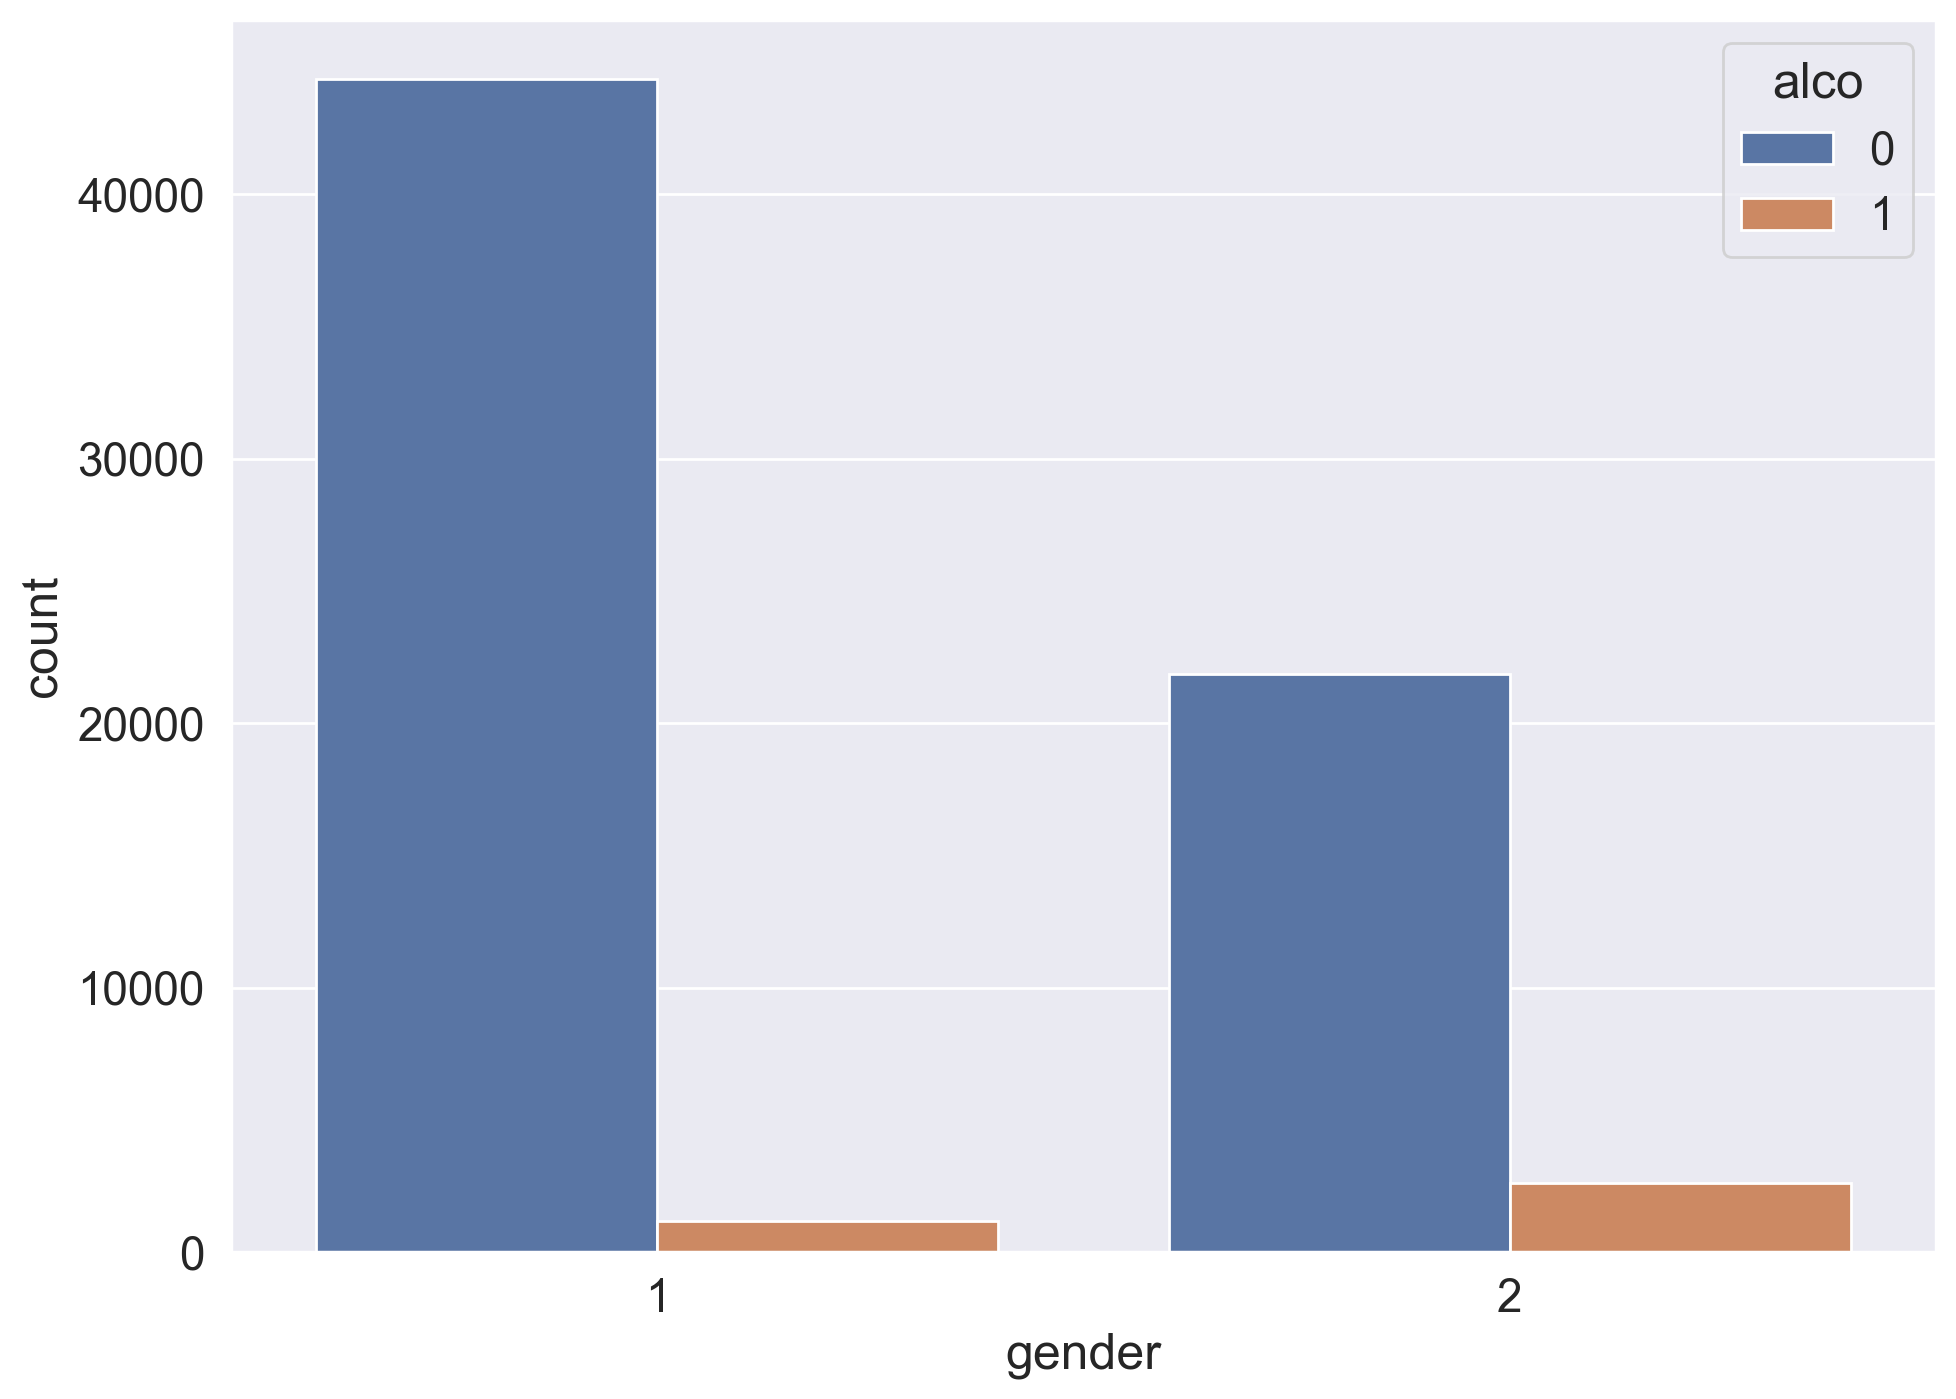

In [9]:
sns.countplot(x='gender', hue='alco', data=df)

In [12]:
df.groupby("gender")["smoke"].value_counts(normalize=True)

gender  smoke
1       0        0.982144
        1        0.017856
2       0        0.781120
        1        0.218880
Name: proportion, dtype: float64

In [ ]:
df['age_years'] = df['age'].apply(lambda x: int(x / 365.25))
df.drop(columns=['cholesterol_level'], inplace=True)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,52
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,61
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,52
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,61


In [16]:
df['bmi'] = df['weight'] / (df['height'] / 100) ** 2

df.groupby('gender')['bmi'].describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
1,45530.0,27.987583,6.495638,8.001829,23.875115,26.709402,31.044558,298.666667
2,24470.0,26.754442,5.162752,3.471784,23.781213,25.910684,29.043709,180.678074


In [18]:
df = df
[
    (df['ap_lo'] <= df['ap_hi']) &
    (df['height'] >= df['height'].quantile(2.5 / 100)) &
    (df['height'] <= df['height'].quantile(97.5 / 100)) &
    (df['weight'] >= df['weight'].quantile(2.5 / 100)) &
    (df['weight'] <= df['weight'].quantile(97.5 / 100))
]

df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,52,26.927438
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,61,50.472681
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,52,31.353579
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,61,27.099251


<Axes: >

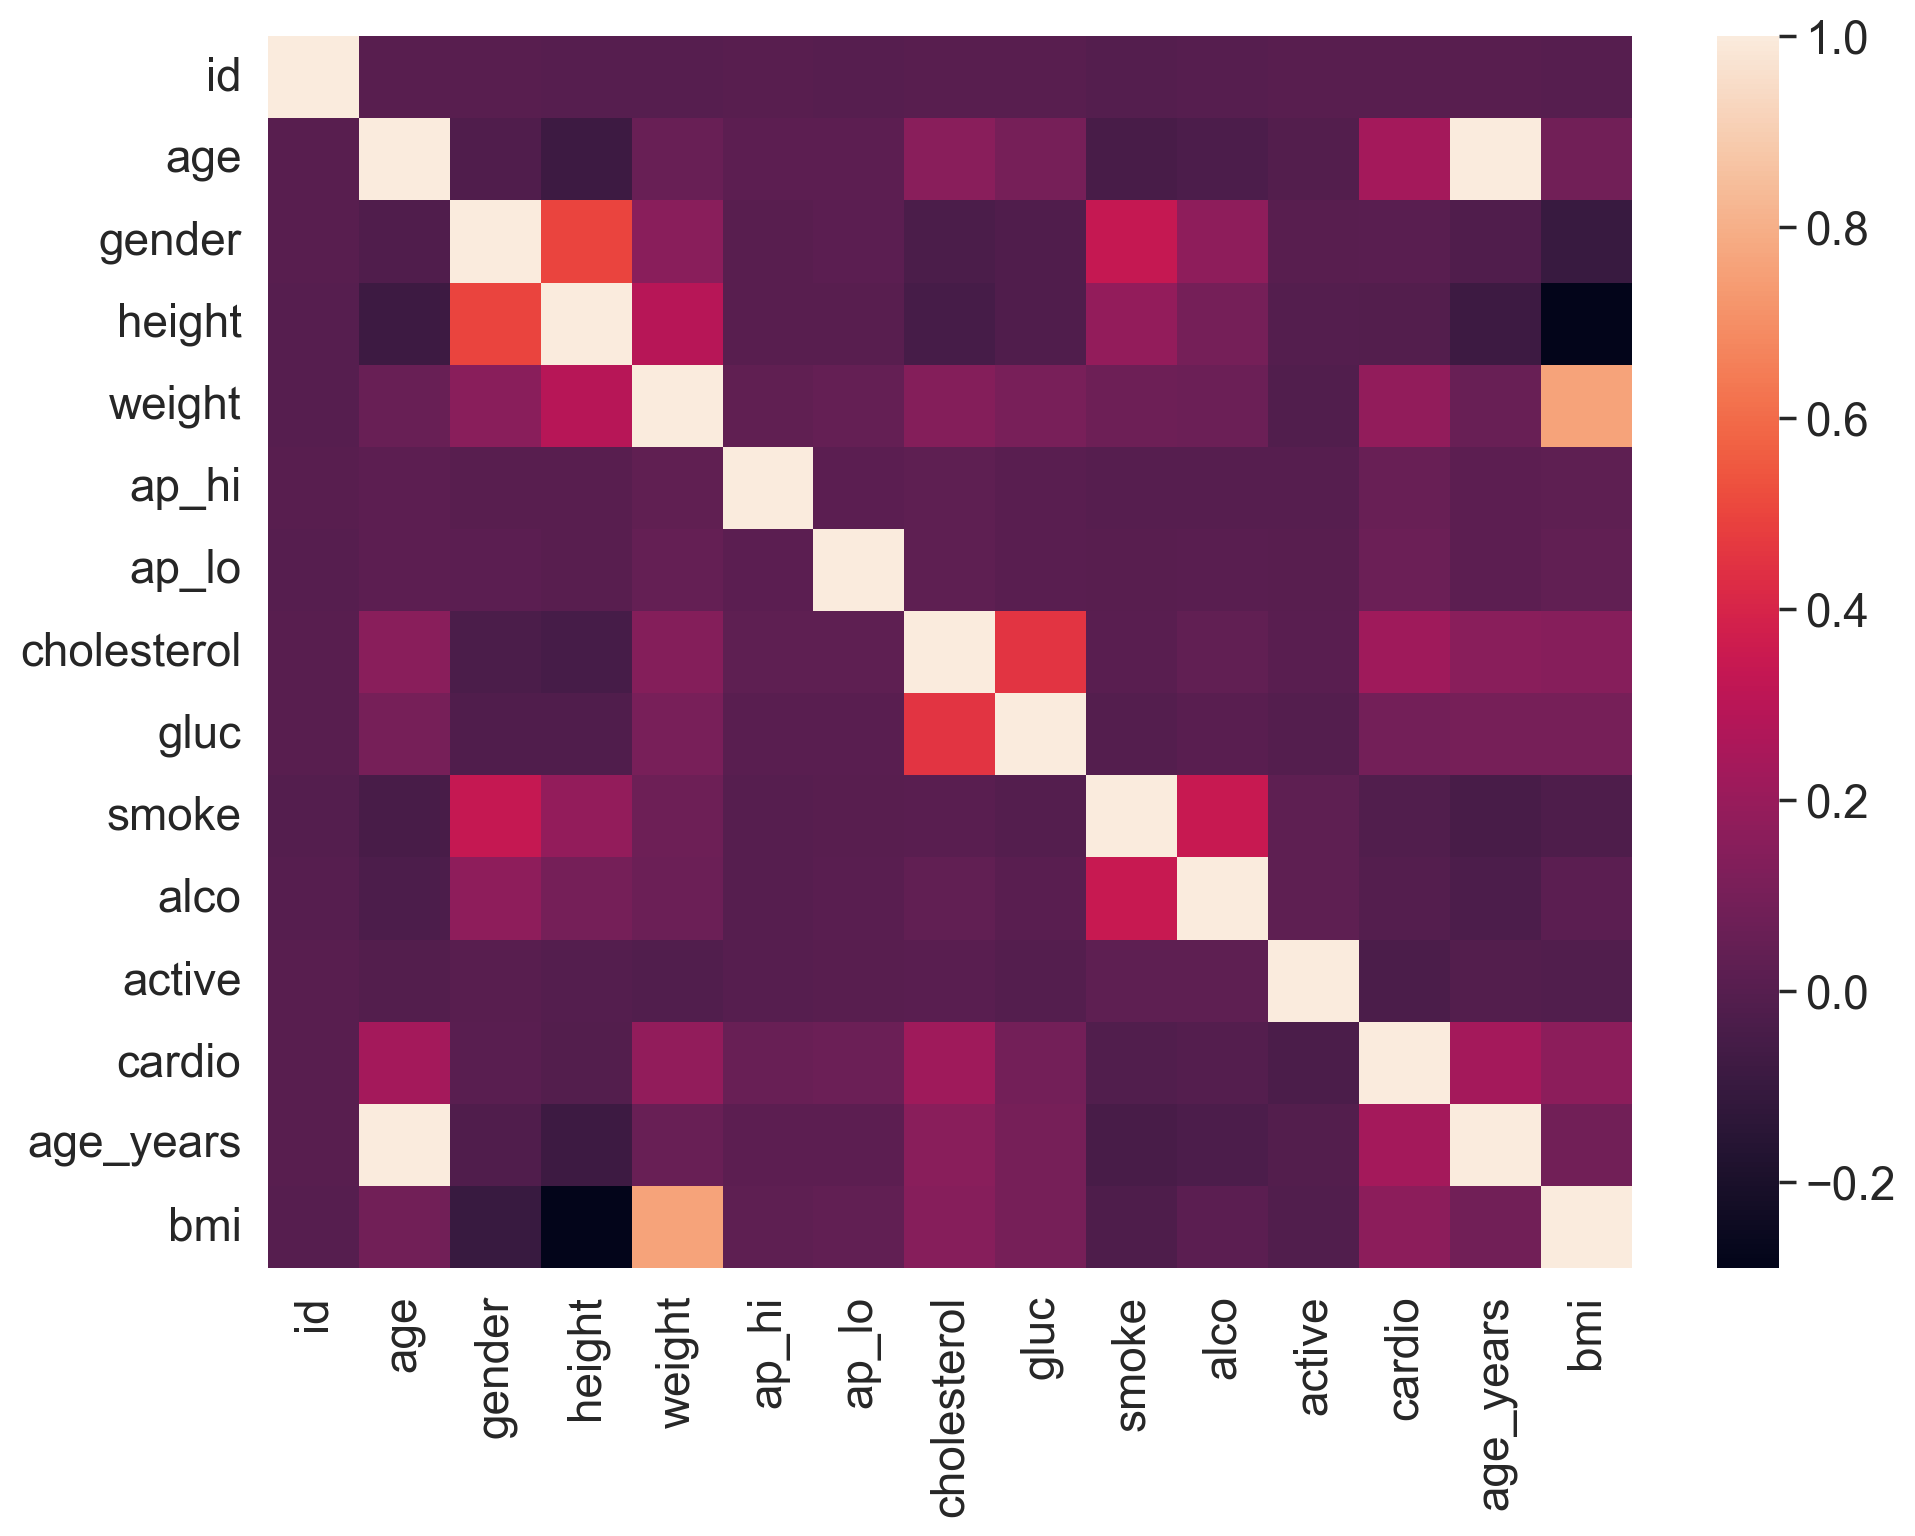

In [19]:
sns.heatmap(
    df.corr(),
    fmt=".2f",
)

<Axes: xlabel='gender', ylabel='height'>

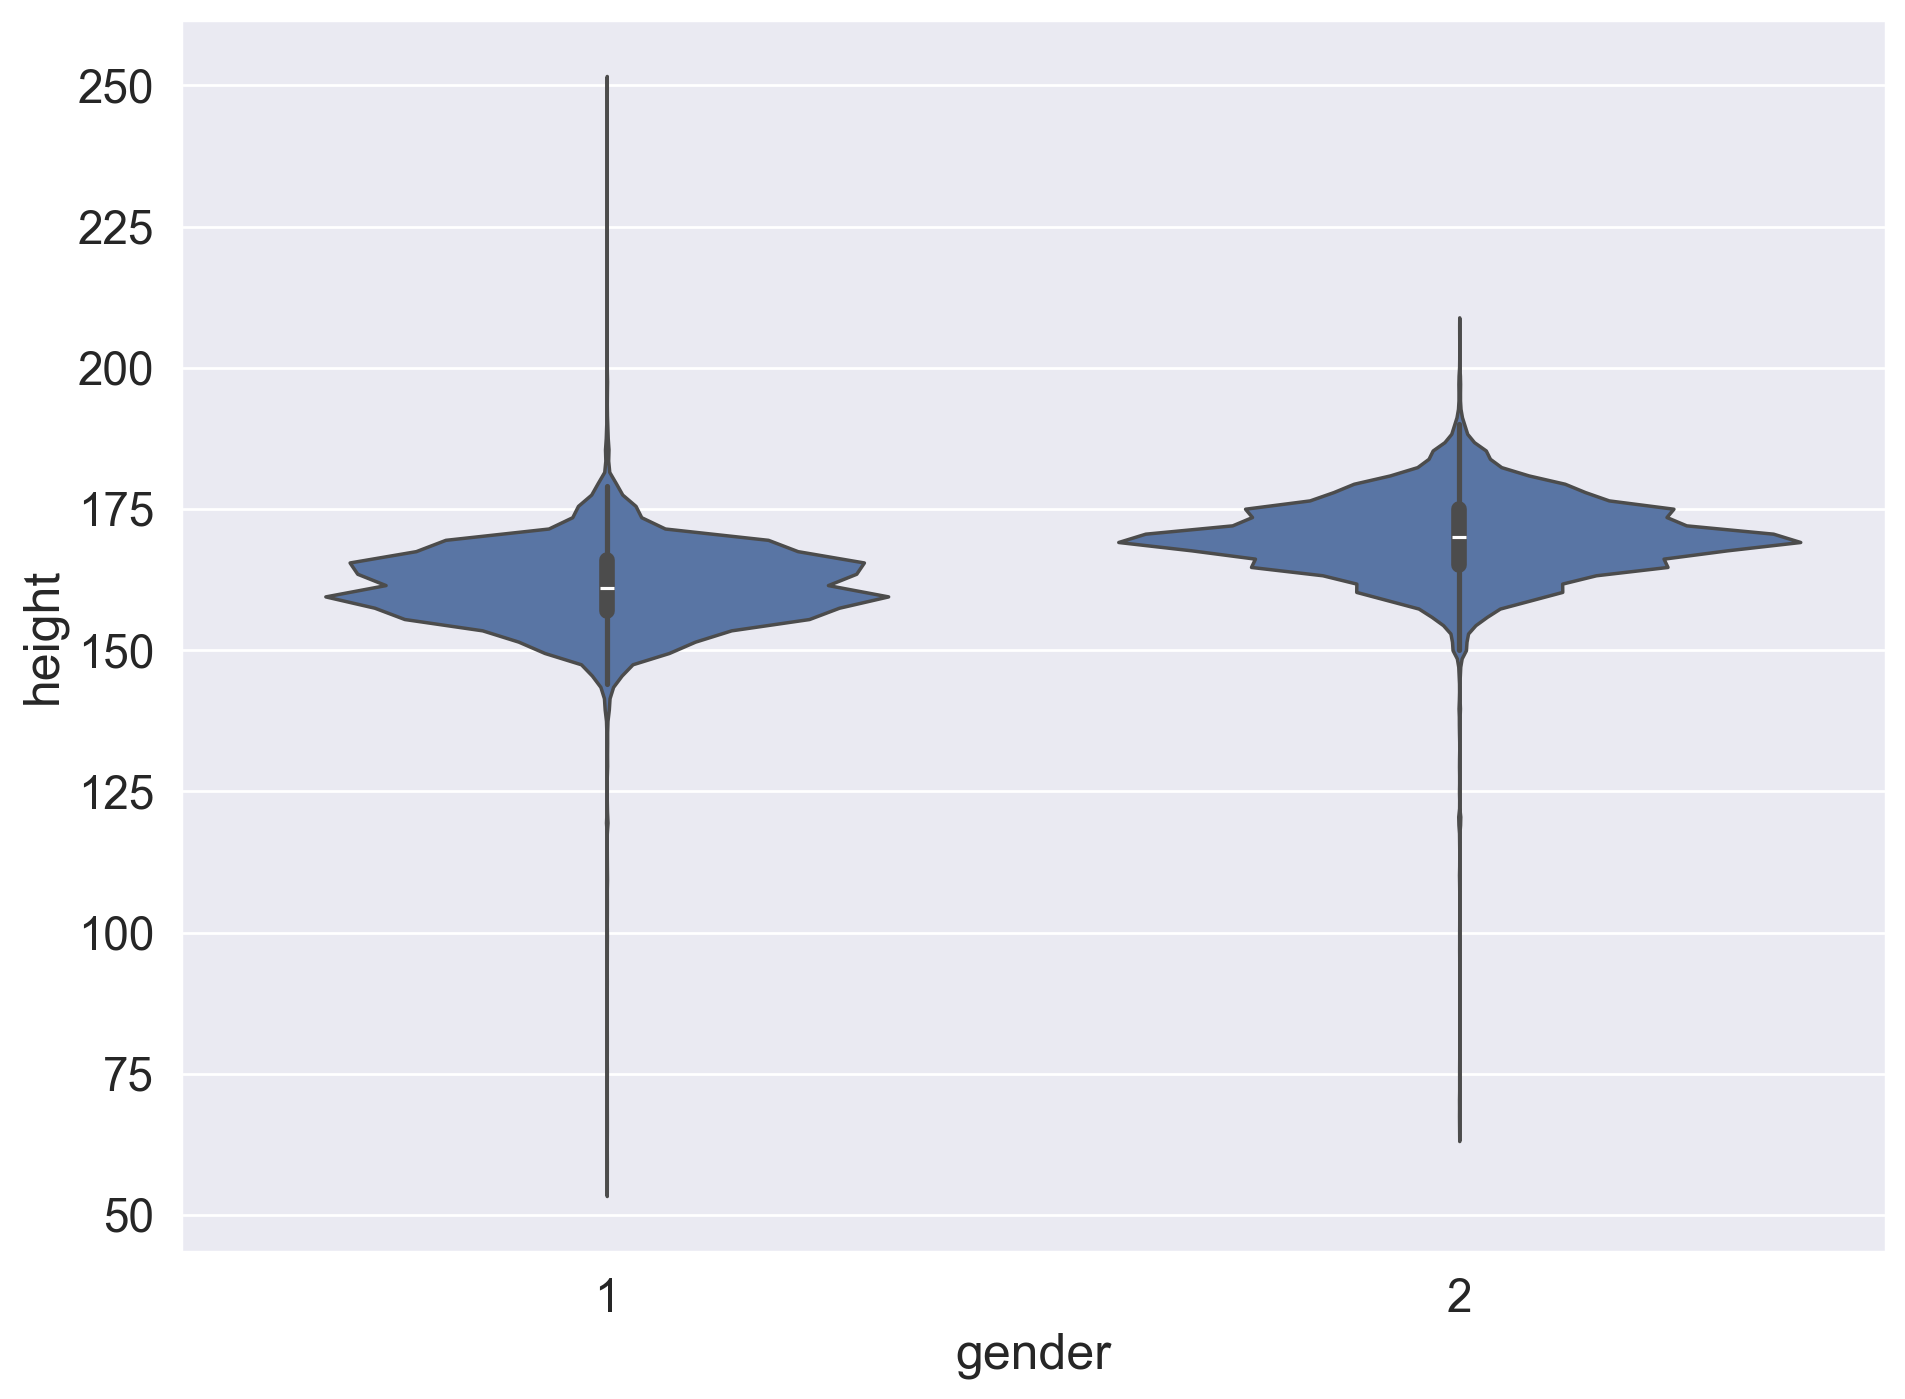

In [22]:
sns.violinplot(y='height', x='gender', data=df)

In [36]:
# rank correlation from high to low and visualize using seaborn

corr = df.corr().unstack().sort_values(ascending=False)
corr.drop_duplicates()




id           id             1.000000
age          age_years      0.999090
bmi          weight         0.762009
height       gender         0.499033
gluc         cholesterol    0.451578
                              ...   
cholesterol  height        -0.050226
height       age_years     -0.081373
             age           -0.081515
bmi          gender        -0.096529
height       bmi           -0.290642
Length: 106, dtype: float64

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27],
 [Text(0, 0, '29'),
  Text(1, 0, '30'),
  Text(2, 0, '39'),
  Text(3, 0, '40'),
  Text(4, 0, '41'),
  Text(5, 0, '42'),
  Text(6, 0, '43'),
  Text(7, 0, '44'),
  Text(8, 0, '45'),
  Text(9, 0, '46'),
  Text(10, 0, '47'),
  Text(11, 0, '48'),
  Text(12, 0, '49'),
  Text(13, 0, '50'),
  Text(14, 0, '51'),
  Text(15, 0, '52'),
  Text(16, 0, '53'),
  Text(17, 0, '54'),
  Text(18, 0, '55'),
  Text(19, 0, '56'),
  Text(20, 0, '57'),
  Text(21, 0, '58'),
  Text(22, 0, '59'),
  Text(23, 0, '60'),
  Text(24, 0, '61'),
  Text(25, 0, '62'),
  Text(26, 0, '63'),
  Text(27, 0, '64')])

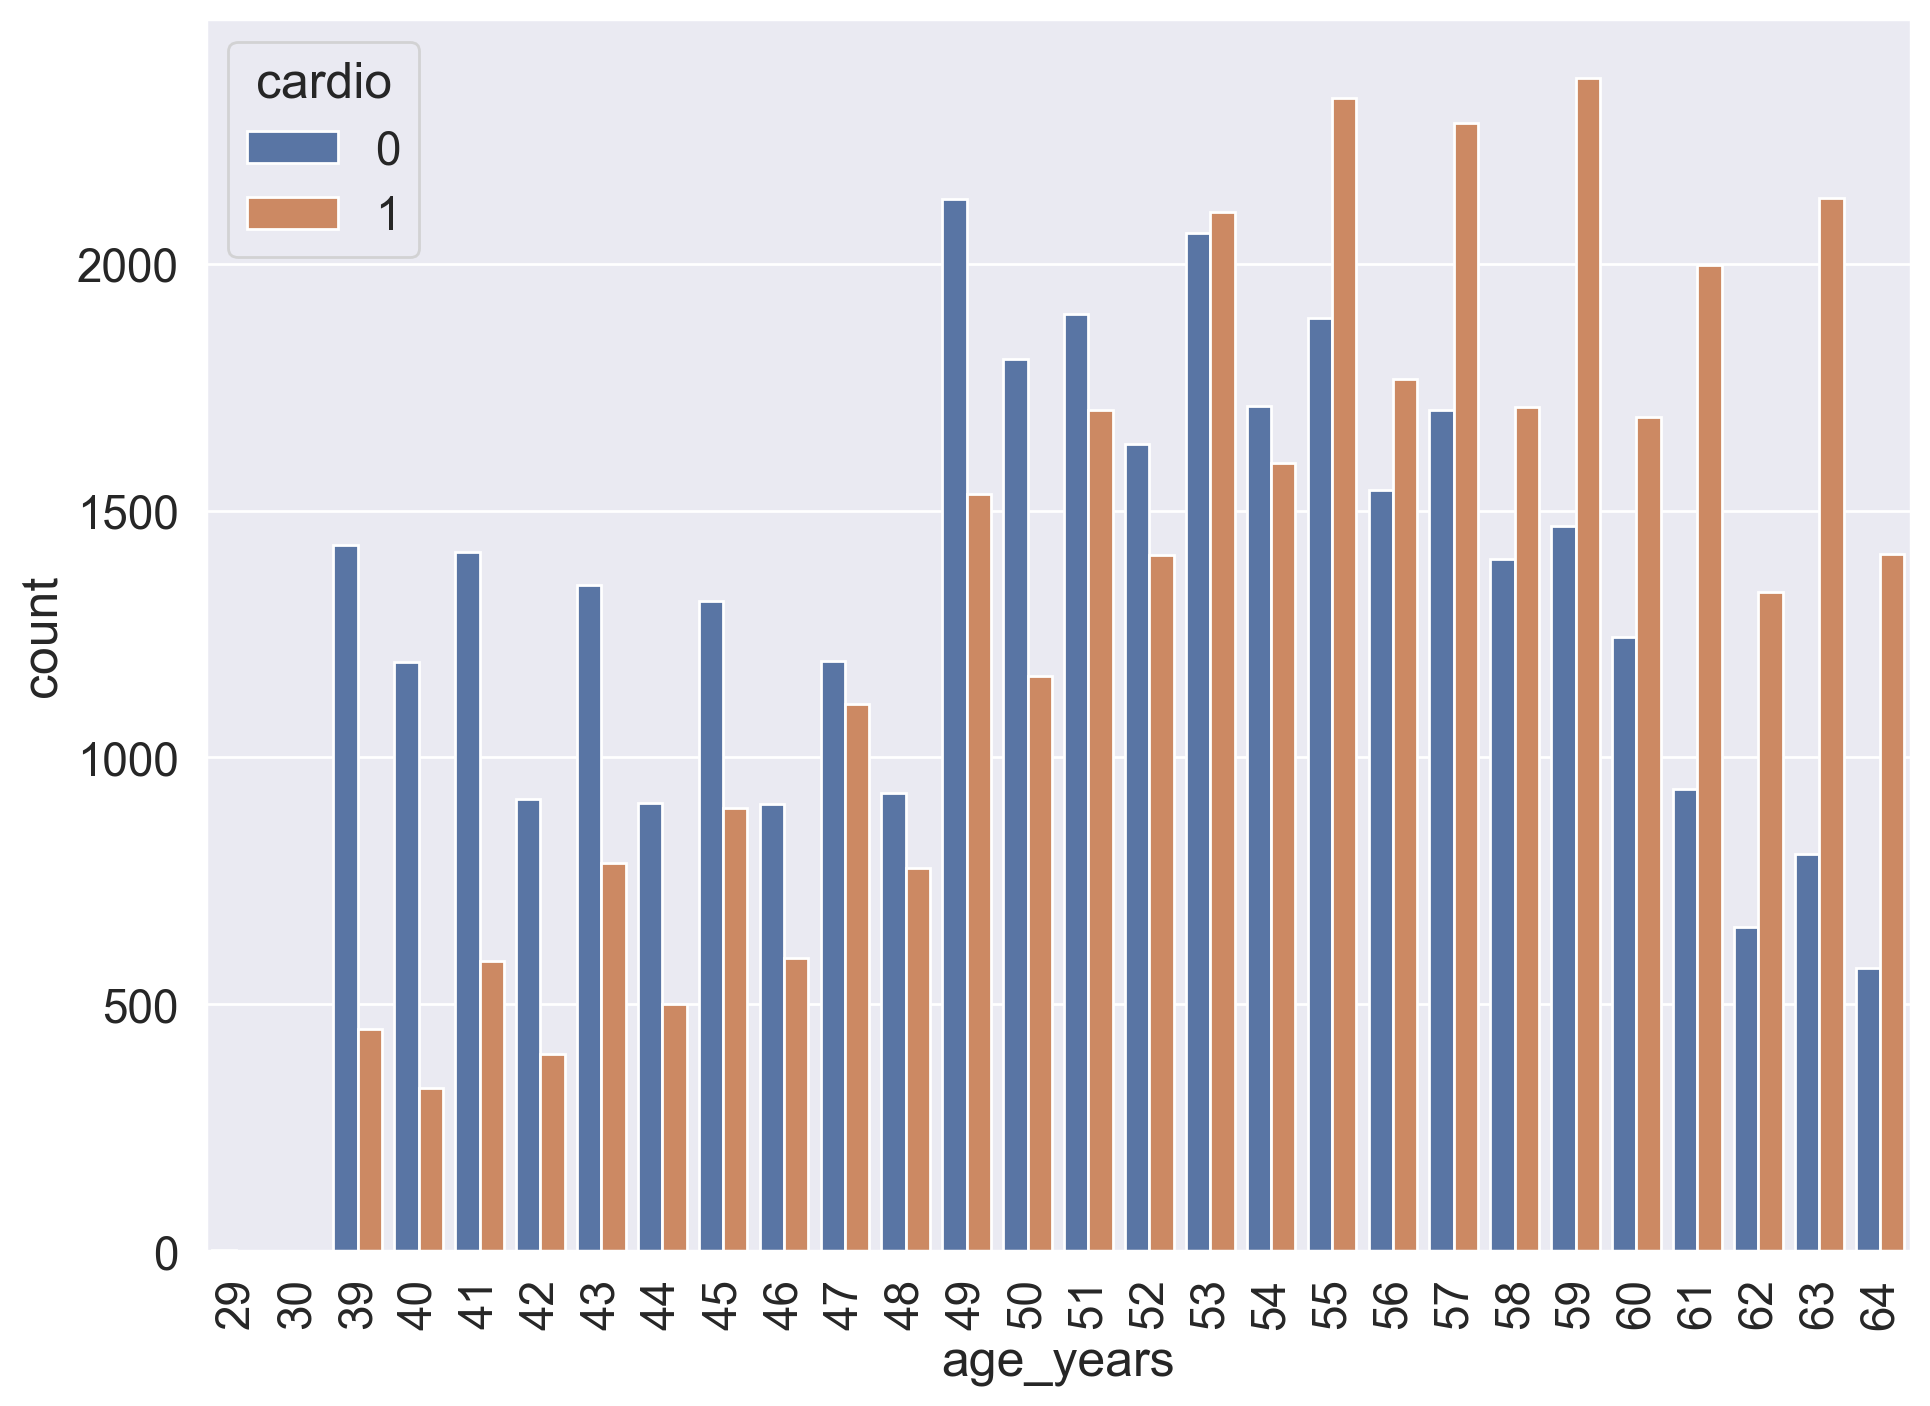

In [40]:
# plot counts of age in years colored by cardio status
# use the full DataFrame as `data` and a column name for x
sns.countplot(x='age_years', hue='cardio', data=df)
plt.xticks(rotation=90)